<a href="https://colab.research.google.com/github/mannenamratha/face_mask_detection/blob/main/face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 93% 152M/163M [00:01<00:00, 118MB/s]
100% 163M/163M [00:01<00:00, 127MB/s]


In [ ]:
# extracting the compessed dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  sample_data


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_765.jpg', 'with_mask_2501.jpg', 'with_mask_439.jpg', 'with_mask_2173.jpg', 'with_mask_2915.jpg']
['with_mask_1071.jpg', 'with_mask_3304.jpg', 'with_mask_1789.jpg', 'with_mask_1615.jpg', 'with_mask_771.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1227.jpg', 'without_mask_1073.jpg', 'without_mask_3307.jpg', 'without_mask_2423.jpg', 'without_mask_3022.jpg']
['without_mask_1072.jpg', 'without_mask_2918.jpg', 'without_mask_2004.jpg', 'without_mask_2943.jpg', 'without_mask_1795.jpg']


In [ ]:
print('number of mask images:', len(with_mask_files))
print('number of without mask images:', len(without_mask_files))

number of mask images: 3725
number of without mask images: 3828


In [ ]:
# create the labels

with_mask_label = [1]*3725
without_mask_label = [0]*3828

print(with_mask_label[0:5])

print(without_mask_label[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_label))
print(len(without_mask_label))

3725
3828


In [ ]:
labels = with_mask_label + without_mask_label

In [ ]:

labels = with_mask_label + without_mask_label

print(len(labels))
print(labels[0:5])
print(labels[-5:])


7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


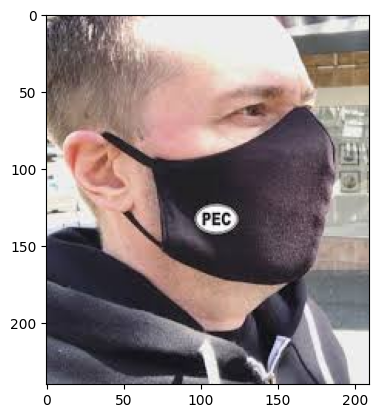

In [ ]:
img = mpimg.imread('/content/data/with_mask/with_mask_2637.jpg')
imgplot  = plt.imshow(img)
plt.show()


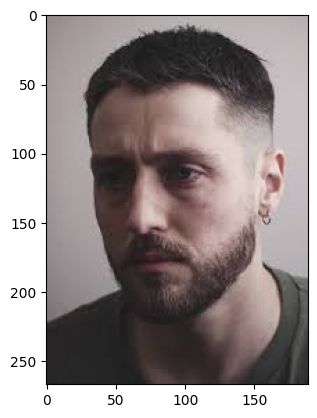

In [ ]:
# displaying without mask image

img = mpimg.imread('/content/data/without_mask/without_mask_3414.jpg')
imgplot  = plt.imshow(img)
plt.show()

In [ ]:

# convert images to numpy arrays

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
len(data)

7553

In [ ]:
type(data)

list

array([[[175,  45,  55],
        [176,  46,  56],
        [177,  47,  57],
        ...,
        [ 90,  49,  58],
        [ 78,  47,  53],
        [ 66,  44,  52]],

       [[175,  45,  55],
        [176,  46,  56],
        [177,  47,  57],
        ...,
        [ 92,  51,  60],
        [ 80,  48,  56],
        [ 68,  46,  55]],

       [[175,  45,  55],
        [176,  46,  56],
        [177,  47,  57],
        ...,
        [ 94,  55,  64],
        [ 82,  52,  60],
        [ 70,  51,  60]],

       ...,

       [[ 73, 150, 202],
        [ 70, 147, 199],
        [ 71, 148, 200],
        ...,
        [234, 227, 219],
        [232, 225, 217],
        [232, 223, 213]],

       [[ 71, 145, 194],
        [ 69, 142, 191],
        [ 70, 143, 192],
        ...,
        [229, 223, 215],
        [228, 222, 213],
        [229, 221, 211]],

       [[106, 176, 225],
        [103, 173, 222],
        [104, 174, 223],
        ...,
        [237, 233, 224],
        [236, 232, 223],
        [237, 229, 219]]], dtype=uint8)
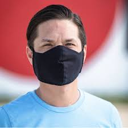

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting images list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)

(7553, 128, 128, 3)


In [ ]:
print(Y.shape)

(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)


(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255


In [ ]:

X_train[[0]]

array([[[[13,  6, 24],
         [13,  6, 24],
         [13,  5, 22],
         ...,
         [11,  9, 22],
         [13, 11, 24],
         [13, 11, 24]],

        [[13,  6, 25],
         [13,  5, 24],
         [11,  4, 21],
         ...,
         [ 9,  7, 20],
         [11,  9, 22],
         [11,  9, 22]],

        [[15,  9, 27],
         [14,  7, 25],
         [10,  5, 21],
         ...,
         [ 6,  4, 17],
         [ 7,  5, 18],
         [ 7,  5, 18]],

        ...,

        [[48, 51, 83],
         [45, 48, 79],
         [37, 41, 69],
         ...,
         [31, 30, 43],
         [31, 32, 45],
         [31, 32, 45]],

        [[51, 55, 86],
         [48, 52, 81],
         [40, 45, 72],
         ...,
         [31, 32, 46],
         [31, 34, 48],
         [31, 34, 48]],

        [[53, 57, 87],
         [50, 54, 82],
         [42, 46, 73],
         ...,
         [30, 33, 48],
         [31, 34, 49],
         [31, 34, 49]]]], dtype=uint8)

In [ ]:
X_train_scaled[0]

array([[[0.05098039, 0.02352941, 0.09411765],
        [0.05098039, 0.02352941, 0.09411765],
        [0.05098039, 0.01960784, 0.08627451],
        ...,
        [0.04313725, 0.03529412, 0.08627451],
        [0.05098039, 0.04313725, 0.09411765],
        [0.05098039, 0.04313725, 0.09411765]],

       [[0.05098039, 0.02352941, 0.09803922],
        [0.05098039, 0.01960784, 0.09411765],
        [0.04313725, 0.01568627, 0.08235294],
        ...,
        [0.03529412, 0.02745098, 0.07843137],
        [0.04313725, 0.03529412, 0.08627451],
        [0.04313725, 0.03529412, 0.08627451]],

       [[0.05882353, 0.03529412, 0.10588235],
        [0.05490196, 0.02745098, 0.09803922],
        [0.03921569, 0.01960784, 0.08235294],
        ...,
        [0.02352941, 0.01568627, 0.06666667],
        [0.02745098, 0.01960784, 0.07058824],
        [0.02745098, 0.01960784, 0.07058824]],

       ...,

       [[0.18823529, 0.2       , 0.3254902 ],
        [0.17647059, 0.18823529, 0.30980392],
        [0.14509804, 0

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the Neural Network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)


Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 167s 971ms/step - acc: 0.6936 - loss: 0.6173 - val_acc: 0.8992 - val_loss: 0.2714
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 195s 929ms/step - acc: 0.8707 - loss: 0.3072 - val_acc: 0.9306 - val_loss: 0.1883
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 203s 933ms/step - acc: 0.9061 - loss: 0.2358 - val_acc: 0.9339 - val_loss: 0.1733
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 161s 946ms/step - acc: 0.9265 - loss: 0.1896 - val_acc: 0.9488 - val_loss: 0.1521
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 198s 925ms/step - acc: 0.9454 - loss: 0.1500 - val_acc: 0.9455 - val_loss: 0.1891
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 164s 965ms/step - acc: 0.9541 - loss: 0.1298 - val_acc: 0.9521 - val_loss: 0.1649
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 196s 931ms/step - acc: 0.9605 - loss: 0.1131 - val_acc: 0.9471 - val_loss: 0.1845
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 203s 938ms/step - acc: 0.9653 - loss: 0.0901 - val_acc: 0.9488 - val_loss: 0.1982
Epoch 9/10
170/170 ━━━━━

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 232ms/step - acc: 0.9408 - loss: 0.1733
Test accuracy = 0.9437458515167236


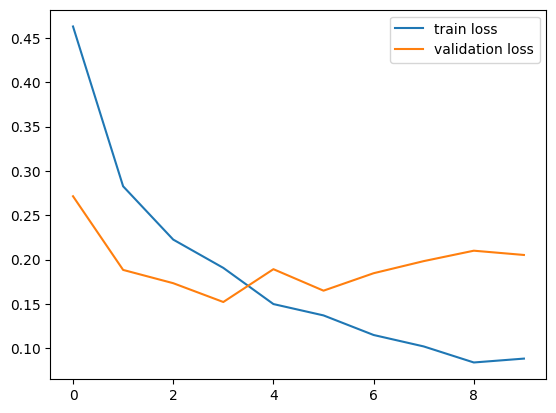

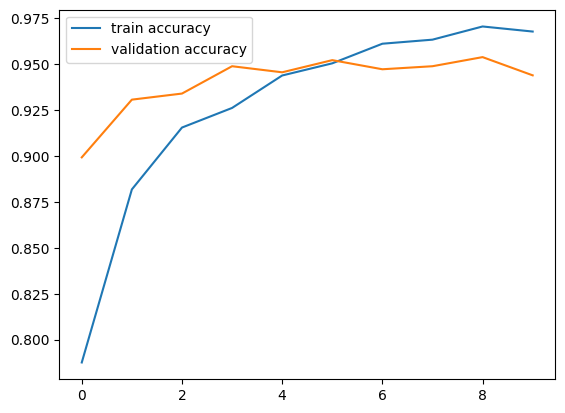

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()